In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from datetime import timedelta
import re
import os

In [10]:
%%bash
pip install pyrogram
pip install xlrd
pip install TgCrypto
pip install openpyxl

cp -f get_chat_history.py ~/venv/lib/python3.9/site-packages/pyrogram/methods/messages/get_chat_history.py
python test.py

Couldn't find program: 'bash'


In [51]:
df = pd.read_excel('teleanal_bd.xlsx', usecols='B:J')
df['date'] = pd.to_datetime(df['date'])
df['text_l'] = df['content'].str.len()
last_id = list(df.id.tail(1))[0]
last_id

281517

In [54]:
df[['id','date','user','photo_w','photo_h','video','voice','video_note','text_l']]

,id,date,user,photo_w,photo_h,video,voice,video_note,text_l
0,191481,2023-06-12 03:18:30,User2,net,net,net,net,net,88.0
1,191482,2023-06-12 03:18:38,User2,net,net,net,net,net,33.0
2,191483,2023-06-12 03:18:58,User2,net,net,net,net,net,27.0
3,191484,2023-06-12 03:18:59,User1,591,1280,net,net,net,NaN
4,191485,2023-06-12 03:19:08,User1,net,net,net,net,net,26.0
...,...,...,...,...,...,...,...,...,...
74297,281510,2023-12-04 14:50:05,User2,net,net,net,net,net,6.0
74298,281511,2023-12-04 14:50:38,User1,net,net,net,net,net,6.0
74299,281512,2023-12-04 14:51:25,User2,net,net,net,net,net,26.0
74300,281513,2023-12-04 14:51:30,User2,net,net,net,net,net,13.0


<b>Исследумые вопросы:</b>

1. Сколько сообщений у каждого (круговая диаграма)+
2. Cколько символов у каждого+
3. Сколько символов на сообщение у каждого+
4. У кого больше аудио и видео сообщений+
5. Кол-во сообщениий в день+
6. Равноценнсти общения в день(сообщения и символы)+
7. Отношение фотографий к сообщениям по неделям+
8. В какое время мы активнее всего общаемся+
9. В какой день недели мы активнее общаемся+
10. Уменьшилась ли длина сообщений со временем+
11. Наиболее популярное слово+
12. Средняя задержка ответа+

In [12]:
total_mess_by_user = df.groupby('user', as_index =False).agg({'id':'nunique'})
total_mess_by_user

,user,id
0,User1,38526
1,User2,35776


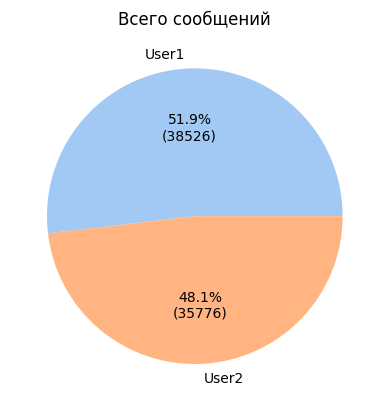

In [13]:
colors = sns.color_palette('pastel')[ 0:5 ]
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(total_mess_by_user.id, labels = total_mess_by_user.user, colors = colors, autopct=lambda pct: func(pct, total_mess_by_user.id))
plt.title('Всего сообщений')
plt.savefig('Всего сообщений.png')
plt.show()

In [14]:
total_char_by_user = df.groupby('user', as_index =False).agg({'text_l':'sum'})
total_char_by_user

,user,text_l
0,User1,729639.0
1,User2,852265.0


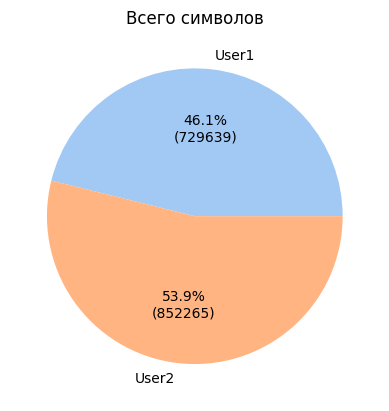

In [15]:
colors = sns.color_palette('pastel')[ 0:5 ]
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
plt.title('Всего символов')
plt.pie(total_char_by_user.text_l, labels = total_char_by_user.user, colors = colors, autopct=lambda pct: func(pct, total_char_by_user.text_l))
plt.savefig('Всего символов.png')
plt.show()

In [16]:
total_char_per_mess_by_user = total_char_by_user.merge(total_mess_by_user, on='user')

total_char_per_mess_by_user['char_per_mess']=(total_char_by_user.merge(total_mess_by_user, on='user').text_l)/(total_char_by_user.merge(total_mess_by_user, on='user').id)

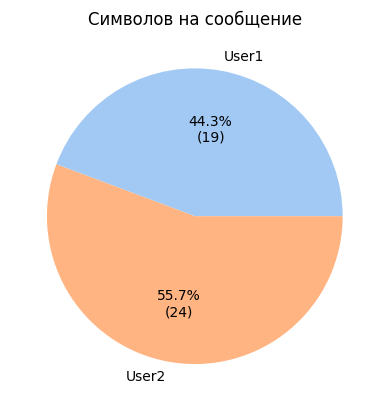

In [17]:
colors = sns.color_palette('pastel')[ 0:5 ]
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
plt.title('Символов на сообщение')
plt.pie(total_char_per_mess_by_user.char_per_mess, labels = total_char_per_mess_by_user.user, colors = colors, autopct=lambda pct: func(pct, total_char_per_mess_by_user.char_per_mess))
plt.savefig('Символов на сообщение.png')
plt.show()

In [18]:
df_voice = df.loc[df["voice"] != 'net']
df_voice_per_user = df_voice.groupby('user', as_index =False).agg({'id':'nunique'})
df_voice_sec_per_user = df_voice.groupby('user', as_index =False).agg({'voice':'sum'})
df_voice_sec_per_user

,user,voice
0,User1,11415
1,User2,1865


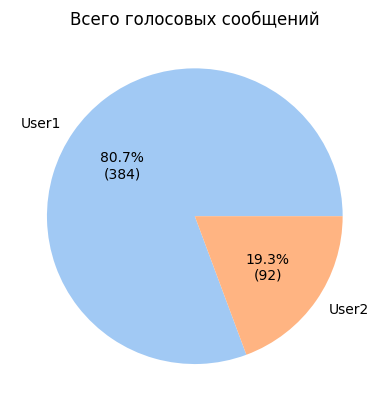

In [19]:
colors = sns.color_palette('pastel')[ 0:5 ]
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
plt.title('Всего голосовых сообщений')
plt.pie(df_voice_per_user.id, labels = df_voice_per_user.user, colors = colors, autopct=lambda pct: func(pct, df_voice_per_user.id))
plt.savefig('Всего голосовых сообщений.png')
plt.show()

In [20]:
df_video_note = df.loc[df["video_note"] != 'net']
df_video_note_per_user = df_video_note.groupby('user', as_index =False).agg({'id':'nunique'})
df_video_note_sec_per_user = df_video_note.groupby('user', as_index =False).agg({'video_note':'sum'})
df_video_note_sec_per_user

,user,video_note
0,User1,3083
1,User2,10760


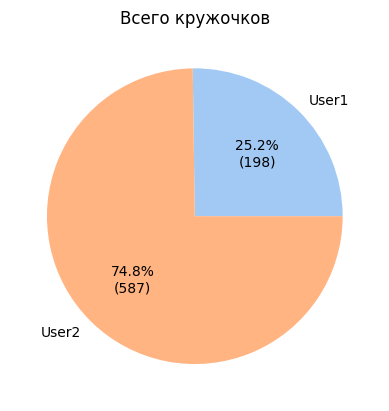

In [21]:
colors = sns.color_palette('pastel')[ 0:5 ]
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
plt.title('Всего кружочков')
plt.pie(df_video_note_per_user.id, labels = df_video_note_per_user.user, colors = colors, autopct=lambda pct: func(pct, df_video_note_per_user.id))
plt.savefig('Всего кружочков.png')
plt.show()


In [22]:
df_video_note_voice_sec_per_user = df_voice_sec_per_user.merge(df_video_note_sec_per_user, on='user')
df_video_note_voice_sec_per_user = df_video_note_voice_sec_per_user.melt('user')

C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

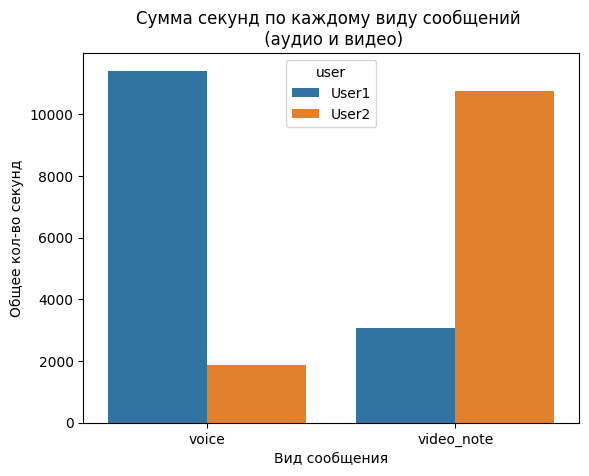

In [24]:
sns.barplot(data=df_video_note_voice_sec_per_user, x="variable", y="value",hue = "user").set(title='Сумма секунд по каждому виду сообщений \n (аудио и видео)', ylabel='Общее кол-во секунд', xlabel="Вид сообщения")
plt.savefig('Сумма секунд по каждому виду сообщений (аудио и видео).png')


In [35]:
df_day = df
df_day['date'] = pd.to_datetime(df_day['date']).dt.date
mess_per_day_by_user = df_day.groupby(['user','date'],as_index = False).agg({'id':'nunique'}).sort_values(['user','date'])
sum(list(mess_per_day_by_user[mess_per_day_by_user.user == 'User2'].sort_values('id',ascending=False).head(1)['id'])+list(mess_per_day_by_user[mess_per_day_by_user.user == 'User1'].sort_values('id',ascending=False).head(1)['id']))

1441

C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

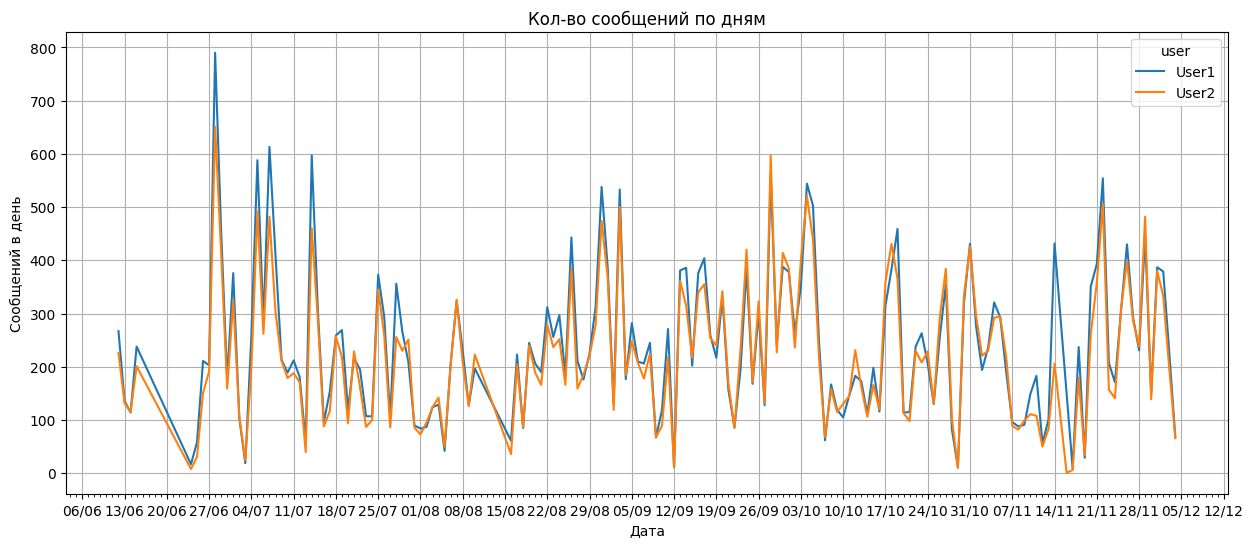

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
g = sns.lineplot(data=mess_per_day_by_user, x="date", y="id", hue="user").set(title='Кол-во сообщений по дням', ylabel='Сообщений в день', xlabel="Дата")

plt.savefig('Кол-во сообщений по дням.png')

In [37]:
df_day = df
df_day['date'] = pd.to_datetime(df_day['date']).dt.date
char_per_day_by_user = df_day.groupby(['user','date'],as_index = False).agg({'text_l':'sum'}).sort_values(['user','date'])
char_per_day_by_user

,user,date,text_l
0,User1,2023-06-12,4942.0
1,User1,2023-06-13,2372.0
2,User1,2023-06-14,2380.0
3,User1,2023-06-15,4353.0
4,User1,2023-06-24,394.0
...,...,...,...
318,User2,2023-11-30,3103.0
319,User2,2023-12-01,9493.0
320,User2,2023-12-02,7876.0
321,User2,2023-12-03,5698.0


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

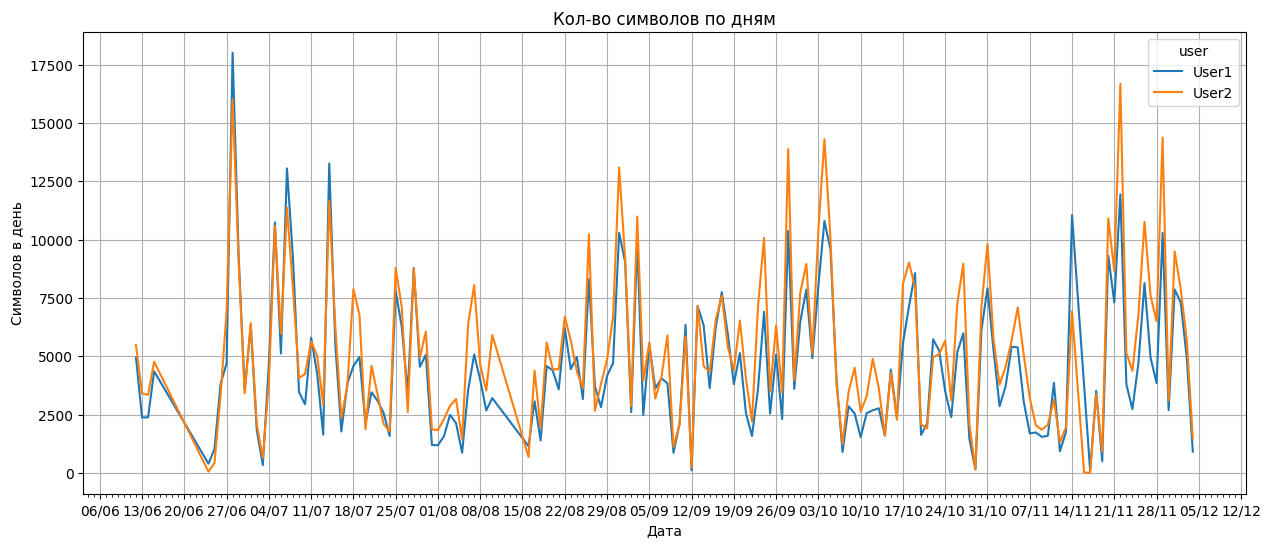

In [38]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
g = sns.lineplot(data=char_per_day_by_user, x="date", y="text_l", hue="user").set(title='Кол-во символов по дням', ylabel='Символов в день', xlabel="Дата")
plt.savefig('Кол-во символов по дням.png')

In [40]:
df_day_jull = df.loc[df["user"] == 'User1']
df_day_jull['date'] = pd.to_datetime(df_day_jull['date']).dt.date
mess_per_day_by_jull = df_day_jull.groupby(['user','date'],as_index = False).agg({'id':'nunique'}).sort_values(['user','date'])

df_day_alex = df.loc[df["user"] == 'User2']
df_day_alex['date'] = pd.to_datetime(df_day_alex['date']).dt.date
mess_per_day_by_alex = df_day_alex.groupby(['user','date'],as_index = False).agg({'id':'nunique'}).sort_values(['user','date'])

dff = mess_per_day_by_jull.merge(mess_per_day_by_alex, on='date')
dff['balans'] = dff.id_x/dff.id_y
dff['line'] = 1
dff

C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\817063209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_jull['date'] = pd.to_datetime(df_day_jull['date']).dt.date
C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\817063209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_alex['date'] = pd.to_datetime(df_day_alex['date']).dt.date


,user_x,date,id_x,user_y,id_y,balans,line
0,User1,2023-06-12,267,User2,226,1.181416,1
1,User1,2023-06-13,136,User2,132,1.030303,1
2,User1,2023-06-14,114,User2,115,0.991304,1
3,User1,2023-06-15,238,User2,201,1.184080,1
4,User1,2023-06-24,17,User2,8,2.125000,1
...,...,...,...,...,...,...,...
156,User1,2023-11-30,150,User2,139,1.079137,1
157,User1,2023-12-01,387,User2,380,1.018421,1
158,User1,2023-12-02,379,User2,333,1.138138,1
159,User1,2023-12-03,227,User2,197,1.152284,1


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

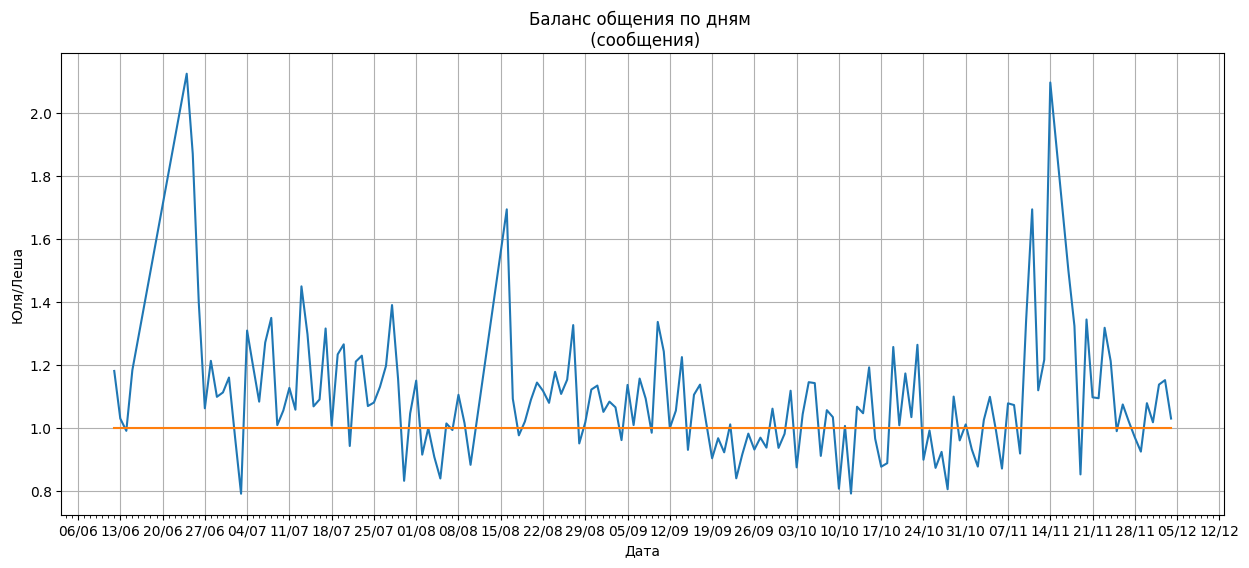

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
sns.lineplot(data=dff, x="date", y="balans").set(title='Баланс общения по дням \n (сообщения)', ylabel='Юля/Леша', xlabel="Дата")
sns.lineplot(data=dff, x="date", y="line").set(title='Баланс общения по дням \n (сообщения)', ylabel='Юля/Леша', xlabel="Дата")
plt.savefig('Баланс общения по дням (сообщения).png')


In [42]:
df_day_jull = df.loc[df["user"] == 'User1']
df_day_jull['date'] = pd.to_datetime(df_day_jull['date']).dt.date
char_per_day_by_jull = df_day_jull.groupby(['user','date'],as_index = False).agg({'text_l':'sum'}).sort_values(['user','date'])

df_day_alex = df.loc[df["user"] == 'User2']
df_day_alex['date'] = pd.to_datetime(df_day_alex['date']).dt.date
char_per_day_by_alex = df_day_alex.groupby(['user','date'],as_index = False).agg({'text_l':'sum'}).sort_values(['user','date'])

dff_char = char_per_day_by_jull.merge(char_per_day_by_alex, on='date')
dff_char['balans'] = dff_char.text_l_x/dff_char.text_l_y
dff_char['line'] = 1
dff_char

C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\1511753477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_jull['date'] = pd.to_datetime(df_day_jull['date']).dt.date
C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\1511753477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_alex['date'] = pd.to_datetime(df_day_alex['date']).dt.date


,user_x,date,text_l_x,user_y,text_l_y,balans,line
0,User1,2023-06-12,4942.0,User2,5481.0,0.901660,1
1,User1,2023-06-13,2372.0,User2,3410.0,0.695601,1
2,User1,2023-06-14,2380.0,User2,3339.0,0.712788,1
3,User1,2023-06-15,4353.0,User2,4766.0,0.913345,1
4,User1,2023-06-24,394.0,User2,50.0,7.880000,1
...,...,...,...,...,...,...,...
156,User1,2023-11-30,2685.0,User2,3103.0,0.865292,1
157,User1,2023-12-01,7861.0,User2,9493.0,0.828084,1
158,User1,2023-12-02,7300.0,User2,7876.0,0.926866,1
159,User1,2023-12-03,4925.0,User2,5698.0,0.864338,1


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

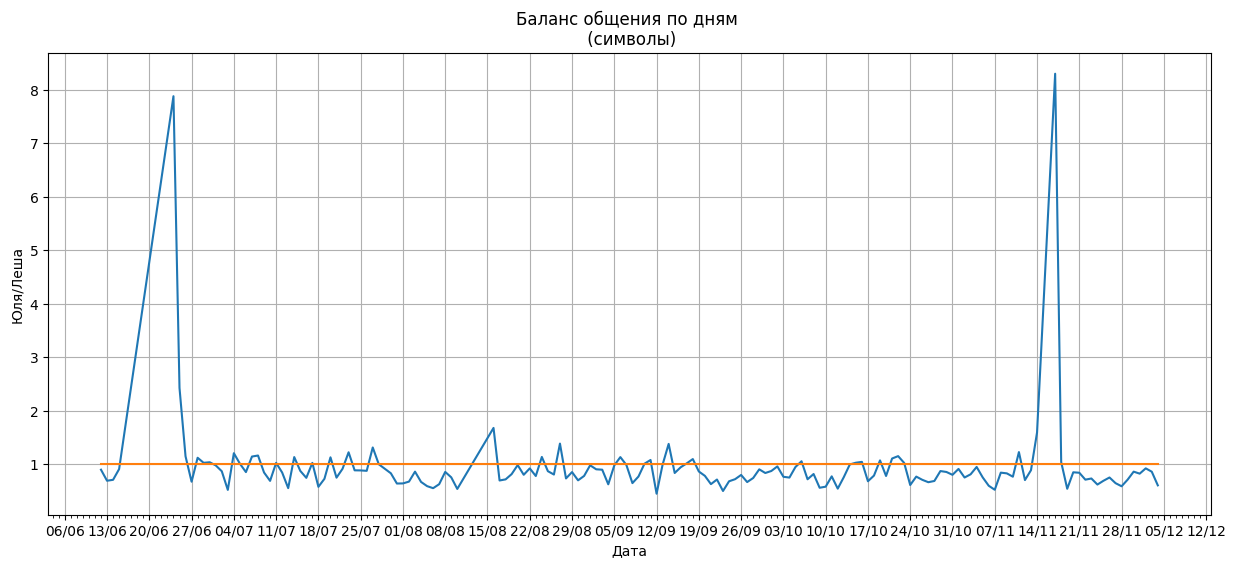

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
sns.lineplot(data=dff_char, x="date", y="balans").set(title='Баланс общения по дням \n (символы)', ylabel='Юля/Леша', xlabel="Дата")
sns.lineplot(data=dff_char, x="date", y="line").set(title='Баланс общения по дням \n (символы)', ylabel='Юля/Леша', xlabel="Дата")
plt.savefig('Баланс общения по дням (символы).png')


datetime.timedelta(days=7)

In [45]:
df_photo = df.query('photo_w != "net"')
df_photo['date'] = pd.to_datetime(df_photo['date'])
df_photo = df_photo.groupby('date',as_index=False).agg({'id':'nunique'})
df_photo = df_photo.groupby(pd.Grouper(key='date', freq='W'))['id'].sum().reset_index().sort_values('date').rename(columns={'id':'photo'})
df_photo



C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\1890309462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_photo['date'] = pd.to_datetime(df_photo['date'])


,date,photo
0,2023-06-18,70
1,2023-06-25,13
2,2023-07-02,137
3,2023-07-09,142
4,2023-07-16,81
5,2023-07-23,64
6,2023-07-30,122
7,2023-08-06,92
8,2023-08-13,71
9,2023-08-20,115


In [46]:
df_mess = df.query('photo_w == "net"&content.notna()')
df_mess['date'] = pd.to_datetime(df_mess['date'])
df_mess = df_mess.groupby('date',as_index=False).agg({'id':'nunique'})
df_mess = df_mess.groupby(pd.Grouper(key='date', freq='W'))['id'].sum().reset_index().sort_values('date').rename(columns={'id':'messeges'})
df_mess



C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\1993617581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mess['date'] = pd.to_datetime(df_mess['date'])


,date,messeges
0,2023-06-18,1333
1,2023-06-25,99
2,2023-07-02,4116
3,2023-07-09,4145
4,2023-07-16,2940
5,2023-07-23,2346
6,2023-07-30,2985
7,2023-08-06,1377
8,2023-08-13,1612
9,2023-08-20,1428


In [55]:
df_photo_per_mess = df_photo.merge(df_mess, on='date')
df_photo_per_mess['photo_per_mess'] = df_photo_per_mess.photo/df_photo_per_mess.messeges*100
df_photo_per_mess

,date,photo,messeges,photo_per_mess
0,2023-06-18,70,1333,5.251313
1,2023-06-25,13,99,13.131313
2,2023-07-02,137,4116,3.328474
3,2023-07-09,142,4145,3.425814
4,2023-07-16,81,2940,2.755102
5,2023-07-23,64,2346,2.728048
6,2023-07-30,122,2985,4.087102
7,2023-08-06,92,1377,6.681191
8,2023-08-13,71,1612,4.404467
9,2023-08-20,115,1428,8.053221


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

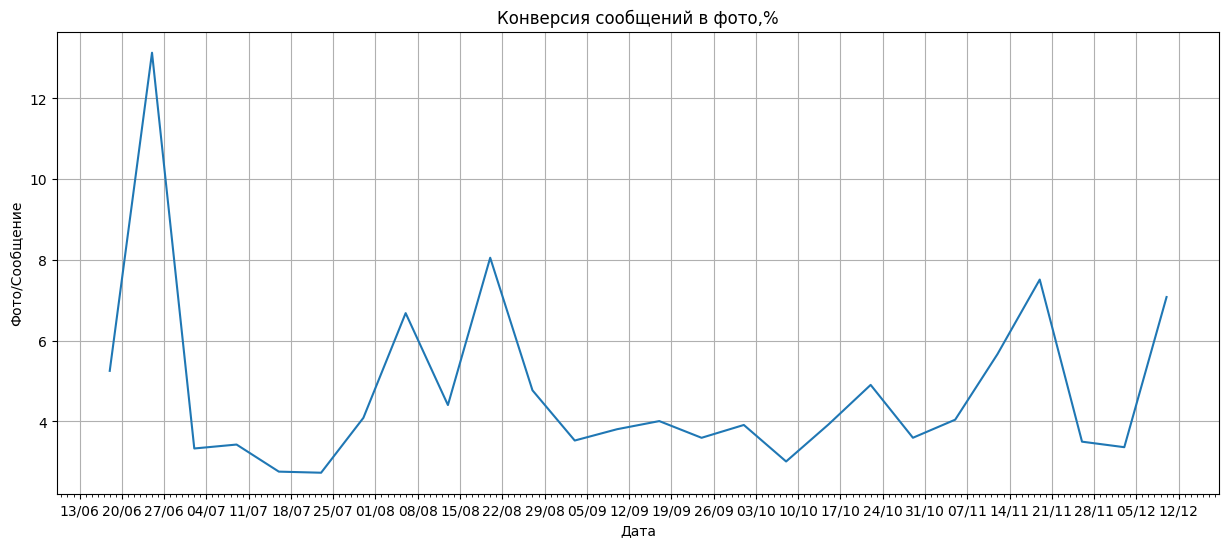

In [56]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
sns.lineplot(data=df_photo_per_mess, x="date", y="photo_per_mess").set(title='Конверсия сообщений в фото,%', ylabel='Фото/Сообщение', xlabel="Дата")
plt.savefig('Конверсия сообщений в фото,%.png')

In [57]:
df_date_day = df
df_date_day['date'] = pd.to_datetime(df_date_day['date'])
df_date_day['date_h'] = df_date_day['date'].dt.strftime('%H')
df_date_day = df_date_day.groupby('date_h').agg({'id':'nunique'}).rename(columns={'id':'messeges'})

In [58]:
df_date_day

,messeges
date_h,
00,4326
01,3336
02,2487
03,1240
04,279
05,223
06,643
07,705
08,829


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


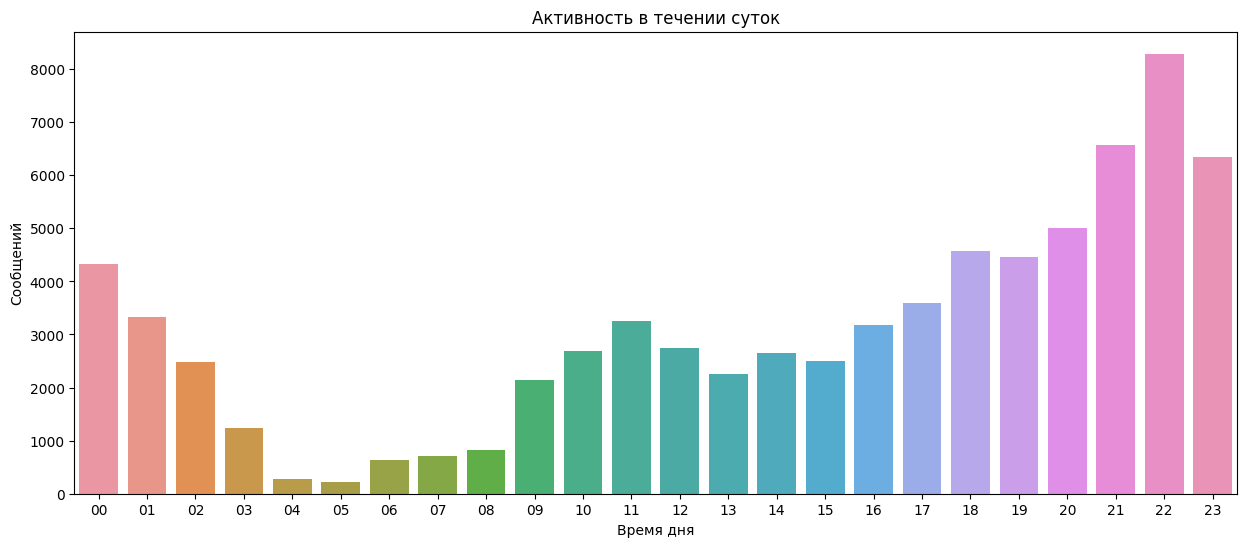

In [59]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%H")
ax.xaxis.set_major_formatter(date_form)
sns.barplot(df_date_day, x=df_date_day.index, y='messeges').set(title='Активность в течении суток', ylabel='Сообщений', xlabel="Время дня")
plt.savefig('Активность в течении суток.png')


In [60]:
df

,id,date,content,user,photo_w,photo_h,video,voice,video_note,text_l,date_h
0,191481,2023-06-12 03:18:30,"Тогда в следующий раз я проснусь, приеду за то...",User2,net,net,net,net,net,88.0,03
1,191482,2023-06-12 03:18:38,И все это время мы будем говорить,User2,net,net,net,net,net,33.0,03
2,191483,2023-06-12 03:18:58,Плюс шутить над окружающими,User2,net,net,net,net,net,27.0,03
3,191484,2023-06-12 03:18:59,NaN,User1,591,1280,net,net,net,NaN,03
4,191485,2023-06-12 03:19:08,Это я еще в чс была у тебя,User1,net,net,net,net,net,26.0,03
...,...,...,...,...,...,...,...,...,...,...,...
74297,281510,2023-12-04 14:50:05,класс),User2,net,net,net,net,net,6.0,14
74298,281511,2023-12-04 14:50:38,Чтоооо,User1,net,net,net,net,net,6.0,14
74299,281512,2023-12-04 14:51:25,Ты завтра поедешь с мамой?,User2,net,net,net,net,net,26.0,14
74300,281513,2023-12-04 14:51:30,или она одна?,User2,net,net,net,net,net,13.0,14


In [61]:
df_date_dow = df
df_date_dow['date_dow'] = df_date_dow['date'].dt.dayofweek
df_date_dow = df_date_dow.groupby('date_dow').agg({'id':'nunique'}).rename(columns={'id':'messeges'})


In [62]:
df_date_dow = df_date_dow.reset_index()

In [63]:
df_date_dow.loc[df_date_dow['date_dow'] == 0, 'dow'] = 'Понедельник'
df_date_dow.loc[df_date_dow['date_dow'] == 1, 'dow'] = 'Вторник'
df_date_dow.loc[df_date_dow['date_dow'] == 2, 'dow'] = 'Среда'
df_date_dow.loc[df_date_dow['date_dow'] == 3, 'dow'] = 'Четверг'
df_date_dow.loc[df_date_dow['date_dow'] == 4, 'dow'] = 'Пятница'
df_date_dow.loc[df_date_dow['date_dow'] == 5, 'dow'] = 'Суббота'
df_date_dow.loc[df_date_dow['date_dow'] == 6, 'dow'] = 'Воскресенье'


C:\Users\atryf\AppData\Local\Temp\ipykernel_9236\2281859868.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Понедельник' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_date_dow.loc[df_date_dow['date_dow'] == 0, 'dow'] = 'Понедельник'


In [64]:
df_date_dow

,date_dow,messeges,dow
0,0,9001,Понедельник
1,1,11012,Вторник
2,2,13015,Среда
3,3,11563,Четверг
4,4,10208,Пятница
5,5,10010,Суббота
6,6,9493,Воскресенье


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


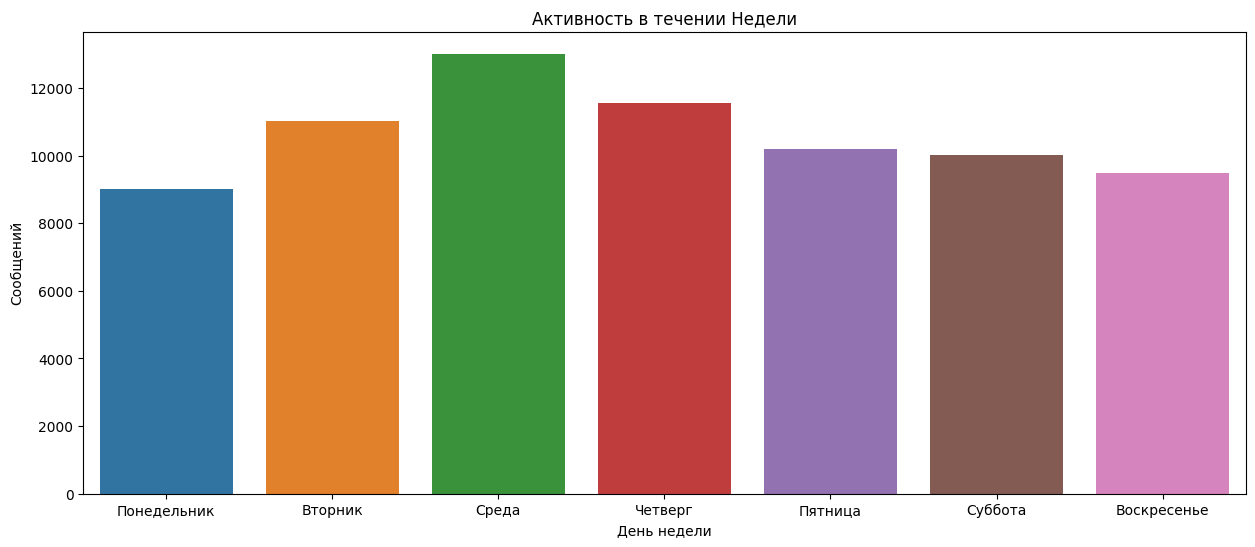

In [65]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%H")
ax.xaxis.set_major_formatter(date_form)
sns.barplot(df_date_dow, x='dow', y='messeges').set(title='Активность в течении Недели', ylabel='Сообщений', xlabel="День недели")
plt.savefig('Активность в течении Недели.png') 


In [66]:
df_length_text_in_time = df
df_length_text_in_time['date'] = pd.to_datetime(df_length_text_in_time['date'])
df_length_text_in_time = df_length_text_in_time.groupby(pd.Grouper(key='date', freq='W'))['text_l'].mean().reset_index().sort_values('date')

In [67]:
df_length_text_in_time

,date,text_l
0,2023-06-18,23.288072
1,2023-06-25,19.070707
2,2023-07-02,23.001944
3,2023-07-09,21.935826
4,2023-07-16,24.941156
5,2023-07-23,23.399829
6,2023-07-30,25.965829
7,2023-08-06,23.842411
8,2023-08-13,22.977667
9,2023-08-20,22.115546


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

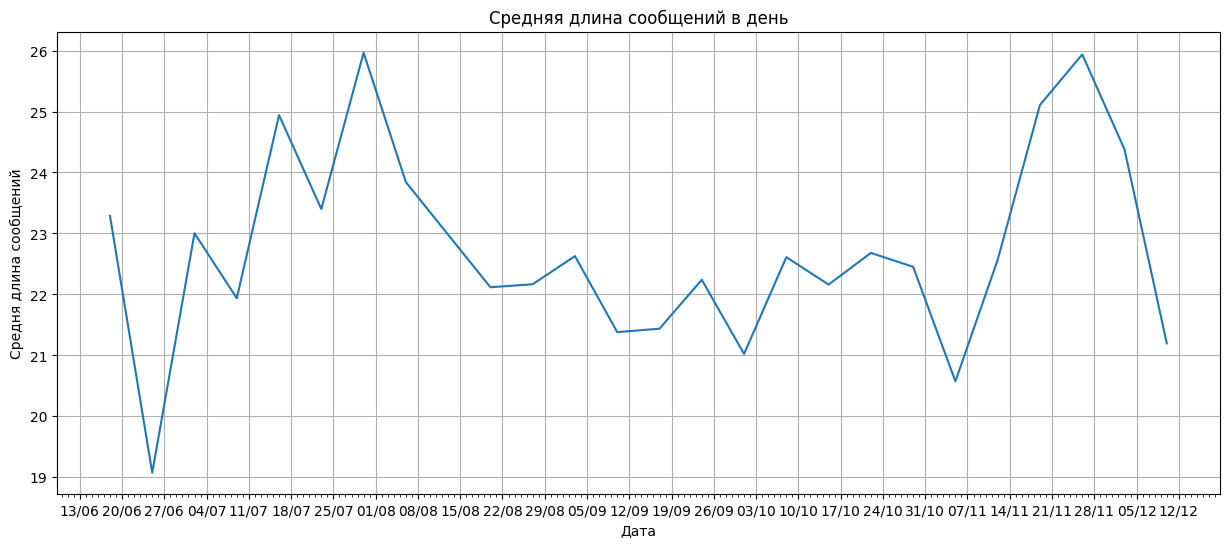

In [68]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.grid()
sns.lineplot(data=df_length_text_in_time, x="date", y="text_l").set(title='Средняя длина сообщений в день', ylabel='Средня длина сообщений', xlabel="Дата")
plt.savefig('Средняя длина сообщений в день.png') 

In [71]:
df['date_diff'] = df['date'].diff().apply(lambda x: x.total_seconds())
df_diff_time = df.groupby(['user',pd.Grouper(key='date', freq='W')])['date_diff'].median().reset_index()
df_diff_time

,user,date,date_diff
0,User1,2023-06-18,13.0
1,User1,2023-06-25,28.0
2,User1,2023-07-02,12.0
3,User1,2023-07-09,11.0
4,User1,2023-07-16,13.0
5,User1,2023-07-23,12.0
6,User1,2023-07-30,13.0
7,User1,2023-08-06,20.0
8,User1,2023-08-13,16.0
9,User1,2023-08-20,15.0


C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atryf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

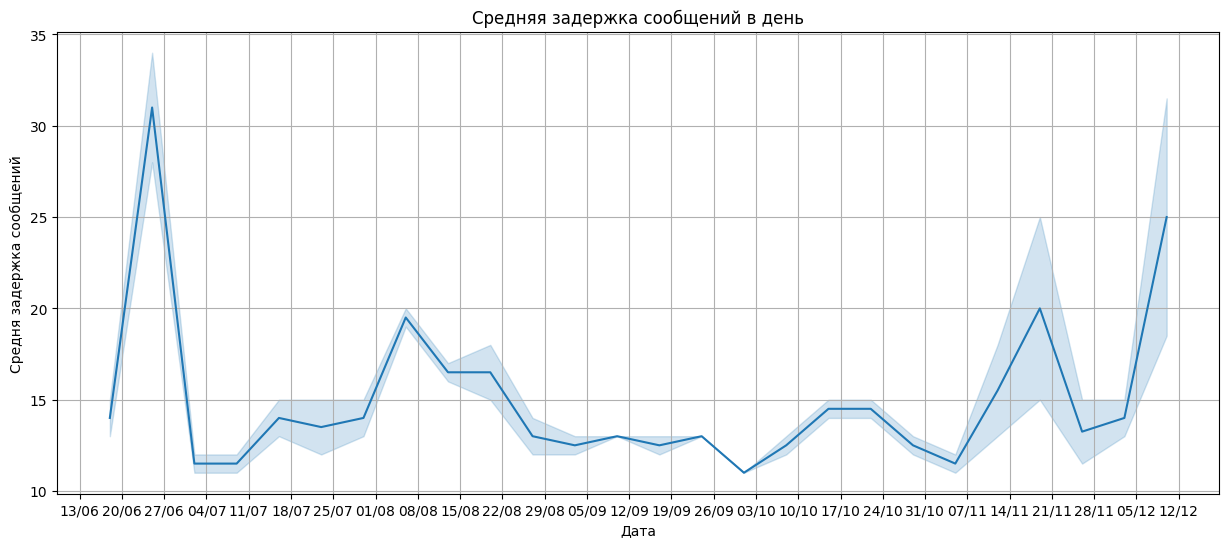

In [72]:
fig, ax = plt.subplots(figsize=(15,6))
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.grid()
sns.lineplot(data=df_diff_time, x="date", y="date_diff").set(title='Средняя задержка сообщений в день', ylabel='Средня задержка сообщений', xlabel="Дата")
plt.savefig('Средняя задержка сообщений в день.png') 